Building a dataset

In [ ]:
import re
import numpy as np
import pandas as pd

In [ ]:
import urllib.parse
url_main='https://www.fifaindex.com/players/?page='
url_join=[str(i) for i in range(1,571)]
#urllib.parse.urljoin(url1, url2)
pages=[urllib.parse.urljoin(url_main, join) for join in url_join]

In [ ]:
import requests
page = requests.get(pages[0])
page

<Response [200]>

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
players=[]
base='https://www.fifaindex.com'
for page in pages:
    soup = BeautifulSoup(requests.get(page).content, 'html.parser')
    for player in soup.find_all(class_='link-player'):
        players.append(urllib.parse.urljoin(base, player.get('href')))
    #players=[player.get('href') for player in soup.find_all(class_='link-player')]

In [ ]:
len(players), players

(34170,
 ['https://www.fifaindex.com/player/188545/robert-lewandowski/fifa23/',
  'https://www.fifaindex.com/player/188545/robert-lewandowski/fifa23/',
  'https://www.fifaindex.com/player/158023/lionel-messi/fifa23/',
  'https://www.fifaindex.com/player/158023/lionel-messi/fifa23/',
  'https://www.fifaindex.com/player/231747/kylian-mbapp%C3%A9/fifa23/',
  'https://www.fifaindex.com/player/231747/kylian-mbapp%C3%A9/fifa23/',
  'https://www.fifaindex.com/player/192985/kevin-de-bruyne/fifa23/',
  'https://www.fifaindex.com/player/192985/kevin-de-bruyne/fifa23/',
  'https://www.fifaindex.com/player/20801/cristiano-ronaldo/fifa23/',
  'https://www.fifaindex.com/player/20801/cristiano-ronaldo/fifa23/',
  'https://www.fifaindex.com/player/215914/ngolo-kant%C3%A9/fifa23/',
  'https://www.fifaindex.com/player/215914/ngolo-kant%C3%A9/fifa23/',
  'https://www.fifaindex.com/player/203376/virgil-viviani/fifa23/',
  'https://www.fifaindex.com/player/203376/virgil-viviani/fifa23/',
  'https://www.fif

In [ ]:
players=list(set(players))

In [ ]:
def to_dict(l, base):
    d = {}
    for i in l: 
        key = i[0:len(i)-1]
        value = i[-1]
        if "".join(key) in base:
            d.setdefault(''.join(key), []).append(value)  
    return d

In [ ]:
def combine_dict(d1, d2):
    return {
        k: tuple(d[k] for d in (d1, d2) if k in d)
        for k in set(d1.keys()) & set(d2.keys())
    }

In [ ]:
base_dict=dict.fromkeys(["Marking", "StandTackle", "Wage", "ShotPower","PreferredPositions","Vision","Composure","SprintSpeed","PreferredFoot","Interceptions","Position","Balance","Crossing","Att.Position",'GKKicking',"ContractLength",'Dribbling','Penalties','GKDiving','Acceleration','BallControl','Heading','GKReflexes','Strength','GKPositioning','LongPass','Reactions','ShortPass','LongShots','Volleys','Jumping','GKHandling','Aggression','Stamina','Finishing','Age','SlideTackle','Agility','FKAcc.','Value','Curve'],[])

In [ ]:
soup = BeautifulSoup(requests.get(players[0], allow_redirects=False).content, 'html.parser')

In [ ]:
attr=[p.text for p in soup.select('p')]
attr

['Currency',
 'Units',
 'Height 191 cm6\'3"',
 'Weight 88 kg194 lbs',
 'Preferred Foot Left',
 'Birth Date March 15, 1983',
 'Age 39',
 'Preferred Positions ST',
 'Player Work Rate Medium / Low',
 'Weak Foot ',
 'Skill Moves ',
 'Value €80.000',
 'Value $100.000',
 'Value £70.000',
 'Wage €1.500',
 'Wage $1.800',
 'Wage £1.300',
 'Position Sub',
 'Kit Number 9',
 'Joined Club Sept. 4, 2020',
 'Contract Length 2021',
 'Ball Control 62',
 'Dribbling 50',
 'Marking 24',
 'Slide Tackle 22',
 'Stand Tackle 24',
 'Aggression 70',
 'Reactions 59',
 'Att. Position 66',
 'Interceptions 37',
 'Vision 58',
 'Composure 63',
 'Crossing 60',
 'Short Pass 55',
 'Long Pass 50',
 'Acceleration 34',
 'Stamina 31',
 'Strength 84',
 'Balance 32',
 'Sprint Speed 35',
 'Agility 28',
 'Jumping 66',
 'Heading 68',
 'Shot Power 65',
 'Finishing 60',
 'Long Shots 60',
 'Curve 63',
 'FK Acc. 52',
 'Penalties 66',
 'Volleys 60',
 'GK Positioning 14',
 'GK Diving 8',
 'GK Handling 15',
 'GK Kicking 6',
 'GK Reflex

In [ ]:
attributes=[]
for player in players:
    soup = BeautifulSoup(requests.get(player, allow_redirects=False).content, 'html.parser')
    attr=[p.text for p in soup.select('p')]
    if attr!=[]:
        attributes.append(to_dict([element.split() for element in attr], base_dict))

In [ ]:
len(attributes[0]), len(attributes)

(41, 17038)

In [ ]:
count=0
for i in attributes:
    if len(i)!=41:
        count+=1
count

1

In [ ]:
for i in attributes:
    if len(i)!=41:
        attributes.remove(i)

In [ ]:
import collections
attributes_combined=collections.defaultdict(list)
for d in attributes:
    for k, v in d.items():  # d.items() in Python 3+
        attributes_combined[k].append(v)

In [ ]:
df=pd.DataFrame.from_dict(attributes_combined)

In [ ]:
df.to_csv(r'C:\Users\User\Documents\data.csv',encoding="utf-8-sig", index = False)

In [ ]:
df.head()

,PreferredFoot,Age,PreferredPositions,Value,Wage,Position,ContractLength,BallControl,Dribbling,Marking,...,LongShots,Curve,FKAcc.,Penalties,Volleys,GKPositioning,GKDiving,GKHandling,GKKicking,GKReflexes
0,[Left],[39],[ST],"[€80.000, $100.000, £70.000]","[€1.500, $1.800, £1.300]",[Sub],[2021],[62],[50],[24],...,[60],[63],[52],[66],[60],[14],[8],[15],[6],[11]
1,[Right],[33],[CB],"[€550.000, $650.000, £475.000]","[€2.400, $2.900, £2.100]",[Sub],[2022],[60],[56],[66],...,[38],[51],[54],[37],[33],[7],[10],[6],[11],[13]
2,[Right],[26],[CB],"[€3.800.000, $4.500.000, £3.300.000]","[€12.000, $14.500, £10.500]",[RCB],[2026],[71],[64],[74],...,[36],[57],[46],[58],[33],[13],[8],[15],[16],[12]
3,[Right],[27],[GK],"[€850.000, $1.000.000, £725.000]","[€4.100, $4.800, £3.500]",[Sub],[2025],[20],[13],[6],...,[20],[16],[12],[29],[13],[65],[66],[68],[65],[72]
4,[Right],[27],[LBRM],"[€525.000, $625.000, £450.000]","[€1.700, $2.100, £1.500]",[LB],[2024],[62],[67],[64],...,[40],[39],[25],[48],[33],[11],[15],[7],[13],[10]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17038 entries, 0 to 17037
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PreferredFoot       17038 non-null  object
 1   Age                 17038 non-null  object
 2   PreferredPositions  17038 non-null  object
 3   Value               17038 non-null  object
 4   Wage                17038 non-null  object
 5   Position            17038 non-null  object
 6   ContractLength      17038 non-null  object
 7   BallControl         17038 non-null  object
 8   Dribbling           17038 non-null  object
 9   Marking             17038 non-null  object
 10  SlideTackle         17038 non-null  object
 11  StandTackle         17038 non-null  object
 12  Aggression          17038 non-null  object
 13  Reactions           17038 non-null  object
 14  Att.Position        17038 non-null  object
 15  Interceptions       17038 non-null  object
 16  Vision              17

Converting data

In [ ]:
def column_converter(column):
    empty=[]
    for position in column:
        for element in position:
            empty.append(int(element))
    column=empty
    return column

In [ ]:
def column3_converter(column):
    empty=[]
    for position in column:
        for value in position:
            if "$" in value:
                empty.append(value)
    return empty

In [ ]:
columns=[column for column in df]
columns.remove("Wage")
columns.remove("Value")
columns.remove("Position")
columns.remove('PreferredFoot')
columns.remove('PreferredPositions')

In [ ]:
columns

['Age',
 'ContractLength',
 'BallControl',
 'Dribbling',
 'Marking',
 'SlideTackle',
 'StandTackle',
 'Aggression',
 'Reactions',
 'Att.Position',
 'Interceptions',
 'Vision',
 'Composure',
 'Crossing',
 'ShortPass',
 'LongPass',
 'Acceleration',
 'Stamina',
 'Strength',
 'Balance',
 'SprintSpeed',
 'Agility',
 'Jumping',
 'Heading',
 'ShotPower',
 'Finishing',
 'LongShots',
 'Curve',
 'FKAcc.',
 'Penalties',
 'Volleys',
 'GKPositioning',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKReflexes']

In [ ]:
for column in columns:
    df[column]=column_converter(df[column])

In [ ]:
df["Value"] = column3_converter(df["Value"])
df["Value"] = df["Value"].replace("[$.]", "", regex=True).astype(int)
df["Wage"] = column3_converter(df["Wage"])
df["Wage"] = df["Wage"].replace("[$.]", "", regex=True).astype(int)
df

,PreferredFoot,Age,PreferredPositions,Value,Wage,Position,ContractLength,BallControl,Dribbling,Marking,...,LongShots,Curve,FKAcc.,Penalties,Volleys,GKPositioning,GKDiving,GKHandling,GKKicking,GKReflexes
0,[Left],39,[ST],100000,1800,[Sub],2021,62,50,24,...,60,63,52,66,60,14,8,15,6,11
1,[Right],33,[CB],650000,2900,[Sub],2022,60,56,66,...,38,51,54,37,33,7,10,6,11,13
2,[Right],26,[CB],4500000,14500,[RCB],2026,71,64,74,...,36,57,46,58,33,13,8,15,16,12
3,[Right],27,[GK],1000000,4800,[Sub],2025,20,13,6,...,20,16,12,29,13,65,66,68,65,72
4,[Right],27,[LBRM],625000,2100,[LB],2024,62,67,64,...,40,39,25,48,33,11,15,7,13,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17033,[Right],35,[STCAM],675000,5900,[CAM],2023,69,66,51,...,67,52,57,68,71,8,6,15,12,14
17034,[Left],25,[LB],9000000,12000,[LB],2025,63,60,74,...,29,47,29,42,32,9,13,9,7,9
17035,[Right],36,[GK],210000,2900,[GK],2022,29,17,15,...,18,15,19,19,13,74,70,68,65,70
17036,[Right],25,[CMCAM],2500000,24000,[Sub],2023,75,75,58,...,61,59,54,58,57,9,6,13,12,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17038 entries, 0 to 17037
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PreferredFoot       17038 non-null  object
 1   Age                 17038 non-null  int64 
 2   PreferredPositions  17038 non-null  object
 3   Value               17038 non-null  int32 
 4   Wage                17038 non-null  int32 
 5   Position            17038 non-null  object
 6   ContractLength      17038 non-null  int64 
 7   BallControl         17038 non-null  int64 
 8   Dribbling           17038 non-null  int64 
 9   Marking             17038 non-null  int64 
 10  SlideTackle         17038 non-null  int64 
 11  StandTackle         17038 non-null  int64 
 12  Aggression          17038 non-null  int64 
 13  Reactions           17038 non-null  int64 
 14  Att.Position        17038 non-null  int64 
 15  Interceptions       17038 non-null  int64 
 16  Vision              17

In [ ]:
np.unique(df["PreferredPositions"])

array([list(['CAM']), list(['CAMCDM']), list(['CAMCDMCM']),
       list(['CAMCDMLM']), list(['CAMCDMST']), list(['CAMCF']),
       list(['CAMCFCM']), list(['CAMCFLM']), list(['CAMCFLW']),
       list(['CAMCFRM']), list(['CAMCFRW']), list(['CAMCFST']),
       list(['CAMCM']), list(['CAMCMCDM']), list(['CAMCMCF']),
       list(['CAMCMLM']), list(['CAMCMLW']), list(['CAMCMRM']),
       list(['CAMCMRW']), list(['CAMCMRWB']), list(['CAMCMST']),
       list(['CAMLM']), list(['CAMLMCF']), list(['CAMLMCM']),
       list(['CAMLMLW']), list(['CAMLMRM']), list(['CAMLMST']),
       list(['CAMLW']), list(['CAMLWCF']), list(['CAMLWCM']),
       list(['CAMLWLM']), list(['CAMLWLWB']), list(['CAMLWRW']),
       list(['CAMLWST']), list(['CAMRB']), list(['CAMRM']),
       list(['CAMRMCF']), list(['CAMRMCM']), list(['CAMRMLB']),
       list(['CAMRMLM']), list(['CAMRMLW']), list(['CAMRMRB']),
       list(['CAMRMRW']), list(['CAMRMST']), list(['CAMRW']),
       list(['CAMRWCF']), list(['CAMRWCM']), list(['C

It can be seen that multiple players' preferred positions are both attacking and mid or mid and defending. My assumption is that a player can only be assigned to one position, therefore I am going to classify players whose preferred positions are not mixed.

In [ ]:
att_positions=["LF", "ST", "CF", "RF"]
mid_positions=["LW", "LM", "CAM", "CDM", "CM", "RM", "RW"]
def_positions=["LWB","LB","CB","RB","RWB"]
gk=["GK"]
positions=att_positions+mid_positions+def_positions+gk
positions

['LF',
 'ST',
 'CF',
 'RF',
 'LW',
 'LM',
 'CAM',
 'CDM',
 'CM',
 'RM',
 'RW',
 'LWB',
 'LB',
 'CB',
 'RB',
 'RWB',
 'GK']

In [ ]:
def assign_pos(example):
    att=0
    dfn=0
    mid=0
    for position in mid_positions:
        if position in example:
            mid+=1
    for position in att_positions:
        if position in example:
            att+=1
    for position in def_positions:
        if position in example:
            dfn+=1
    return dfn*mid, att*mid, dfn*att

def position_filter(positions):
    filtered_positions=[]
    for position in positions:
        if assign_pos(position)==(0,0,0):
            filtered_positions.append(position)
    return filtered_positions

In [ ]:
def str_column_converter(column):
    empty=[]
    for position in column:
        for element in position:
            empty.append(str(element))
    column=empty
    return column

In [ ]:
df["PreferredPositions"]=str_column_converter(df["PreferredPositions"])

In [ ]:
clear_positions=position_filter(np.unique(df["PreferredPositions"]))

In [ ]:
df = df.loc[df["PreferredPositions"].isin(clear_positions)].reset_index(drop=True)

In [ ]:
def rename_position(example):
    for position in mid_positions:
        if position in example:
            example="MID"
    for position in att_positions:
        if position in example:
            example="ATT"
    for position in def_positions:
        if position in example:
            example="DEF"
    return example

In [ ]:
for i in range(0,len(df["PreferredPositions"])):
    df["PreferredPositions"][i]=rename_position(df["PreferredPositions"][i])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.isnull().sum()

PreferredFoot         0
Age                   0
PreferredPositions    0
Value                 0
Wage                  0
Position              0
ContractLength        0
BallControl           0
Dribbling             0
Marking               0
SlideTackle           0
StandTackle           0
Aggression            0
Reactions             0
Att.Position          0
Interceptions         0
Vision                0
Composure             0
Crossing              0
ShortPass             0
LongPass              0
Acceleration          0
Stamina               0
Strength              0
Balance               0
SprintSpeed           0
Agility               0
Jumping               0
Heading               0
ShotPower             0
Finishing             0
LongShots             0
Curve                 0
FKAcc.                0
Penalties             0
Volleys               0
GKPositioning         0
GKDiving              0
GKHandling            0
GKKicking             0
GKReflexes            0
dtype: int64

Classifying

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['PreferredPositions', 'Position','PreferredFoot'])
y = df['PreferredPositions']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=Tru

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.789313 (0.015198)
LDA: 0.946972 (0.006759)
KNN: 0.567290 (0.017048)
CART: 0.915306 (0.007767)
NB: 0.503287 (0.101960)
SVM: 0.422318 (0.000230)


In [ ]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
len(predictions)

2622

In [ ]:
print("LDA Model accuracy on validation set is : ", accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

LDA Model accuracy on validation set is :  0.9469870327993898
[[ 318    0    0   19]
 [   0  760    0   52]
 [   0    0  363    0]
 [  31   37    0 1042]]
             precision    recall  f1-score   support

        ATT       0.91      0.94      0.93       337
        DEF       0.95      0.94      0.94       812
         GK       1.00      1.00      1.00       363
        MID       0.94      0.94      0.94      1110

avg / total       0.95      0.95      0.95      2622



Tuning

In [ ]:
!pip install xgboost

     -------------------------------------- 125.4/125.4 MB 1.5 MB/s eta 0:00:00


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
Y_train=Y_train.replace(to_replace="GK", value=0)
Y_train=Y_train.replace(to_replace="DEF", value=1)
Y_train=Y_train.replace(to_replace="MID", value=2)
Y_train=Y_train.replace(to_replace="ATT", value=3)
Y_validation=Y_validation.replace(to_replace="GK", value=0)
Y_validation=Y_validation.replace(to_replace="DEF", value=1)
Y_validation=Y_validation.replace(to_replace="MID", value=2)
Y_validation=Y_validation.replace(to_replace="ATT", value=3)

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, Y_train)
print('Accuracy of xgb classifier is {:.5f} on training data'.format(xgb_clf.score(X_train, Y_train)))
print('Accuracy of xgb classifier is {:.5f} on validation data'.format(xgb_clf.score(X_validation, Y_validation)))

Accuracy of xgb classifier is 1.00000 on training data
Accuracy of xgb classifier is 0.97063 on validation data


# PRICE REGRESSION

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['PreferredPositions']=encoder.fit_transform(df['PreferredPositions'])

In [ ]:
X2 = df.drop(columns=['Position','Value','PreferredFoot'])
y2 = df['Value']
#X2_train, X2_validation, Y2_train, Y2_validation = train_test_split(X2, y2, test_size=0.20, random_state=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X2,y2,random_state=44,test_size=0.2)
print("X_train shape:{}".format(X_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("X_test shape:{}".format(X_test.shape))
print("y_test shape:{}".format(y_test.shape))

X_train shape:(10485, 38)
y_train shape:(10485,)
X_test shape:(2622, 38)
y_test shape:(2622,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [ ]:
def mae(y_model,y_true):
    """
    The mean_absolute_error
    """
    return mean_absolute_error(y_model,y_true)

In [ ]:
def rmse(y_model,y_true):
    """
    The root_mean_square_error
    """
    return np.sqrt(mean_squared_error(y_model,y_true))

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [3e-06, 1e-5, 3e-5], "eta0": [0.01, 0.03, 0.1],}
lr = SGDRegressor(penalty='l2', n_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=1000, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [3e-06, 1e-05, 3e-05], 'eta0': [0.01, 0.03, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [ ]:
print(grid_search.best_params_)
lr_best = grid_search.best_estimator_
predictions = lr_best.predict(X_test_sc)

{'alpha': 1e-05, 'eta0': 0.01}


In [ ]:
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MSE: 28261199986244.355
MAE: 2321990.990
R^2: 0.675


In [ ]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {"max_depth": [30, 50], "min_samples_split": [3, 5, 10],}
rf = RandomForestRegressor(n_estimators=1000)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [30, 50], 'min_samples_split': [3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [ ]:
print(grid_search.best_params_)
rf_best = grid_search.best_estimator_
predictions = rf_best.predict(X_test)

{'C': 10000, 'epsilon': 0.0001}


In [ ]:
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MSE: 2452455373039771058176.000
MAE: 25726330908.313
R^2: -28205451.563


In [ ]:
from sklearn.svm import SVR
param_grid = {"C": [1000, 3000, 10000],"epsilon": [0.00001, 0.00003, 0.0001],}
svr = SVR(kernel='linear')
grid_search = GridSearchCV(svr, param_grid, cv=5,
scoring='neg_mean_absolute_error')
grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1000, 3000, 10000], 'epsilon': [1e-05, 3e-05, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [ ]:
print(grid_search.best_params_)
svr_best = grid_search.best_estimator_
predictions = svr_best.predict(X_test_sc)

{'C': 10000, 'epsilon': 0.0001}


In [ ]:
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MSE: 80817565441803.312
MAE: 2492624.944
R^2: 0.071


In [ ]:
from sklearn.svm import SVR
param_grid = {"C": [1000, 3000, 10000],"epsilon": [0.00001, 0.00003, 0.0001],}
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5,
scoring='neg_mean_absolute_error')
grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1000, 3000, 10000], 'epsilon': [1e-05, 3e-05, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [ ]:
print(grid_search.best_params_)
svr2_best = grid_search.best_estimator_
predictions = svr2_best.predict(X_test_sc)

{'C': 10000, 'epsilon': 0.0001}


In [ ]:
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MSE: 89450448342665.188
MAE: 2816766.000
R^2: -0.029


In [ ]:
non_linearmodels=[GradientBoostingRegressor(),KNeighborsRegressor()]
for m in non_linearmodels:
    
    m.fit(X_train_sc,y_train)
    y_pred=m.predict(X_test_sc)
    
    print("model : {}".format(m))
    print("training set score:{:0.2f}".format(m.score(X_train_sc,y_train)))
    print("mae:{:0.2f}".format(mae(y_pred,y_test)))
    print("rmse:{:0.2f}".format(rmse(y_pred,y_test)))
    print("r2 value:{:0.2f}".format(m.score(X_test_sc,y_test)))
    print("_ "*30,'\n')
    
### BEST MODEL SO FAR

model : GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
training set score:0.97
mae:1022587.90
rmse:2879423.90
r2 value:0.90
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  

model : KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')
training set score:0.84
mae:1361577.96
rmse:4991093.92
r2 value:0.71
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  



In [ ]:
m=GradientBoostingRegressor()
m.fit(X_train_sc,y_train)
y_pred=m.predict(X_test_sc)

In [ ]:
y_test2=y_test.reset_index(drop=True)

In [ ]:
y_pred

7553       675000
6156     14500000
8569      3800000
10356      160000
10827      925000
           ...   
1355      6000000
8246      2100000
11016     1800000
5588      1200000
9222      2600000
Name: Value, Length: 2622, dtype: int32

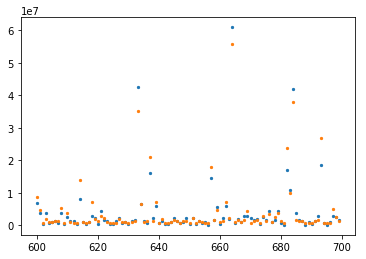

In [ ]:
import matplotlib.pyplot as plt
#err=(X_test-y_pred)/X_test * 100
plt.scatter(range(600,700),y_test2[600:700],s=5)
plt.scatter(range(600,700),y_pred[600:700],s=5)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge,LinearRegression
poly=PolynomialFeatures(degree=4)
X_train_poly=poly.fit_transform(X_train_sc)
X_test_poly=poly.transform(X_test_sc)

linear_models=[LinearRegression(),Ridge(alpha=1)]
for i,m in enumerate(linear_models):
    if i ==0:
        
        m.fit(X_train_sc,y_train)
        y_pred=m.predict(X_test_sc)
    
        print("model : {}".format(m))
        print("training set score:{:0.2f}".format(m.score(X_train_sc,y_train)))
        print("mae:{:0.2f}".format(mae(y_pred,y_test)))
        print("rmse:{:0.2f}".format(rmse(y_pred,y_test)))
        print("test set score:{:0.2f}".format(m.score(X_test_sc,y_test)))
        print("_ "*30,'\n')
    else :
        m.fit(X_train_poly,y_train)
        y_pred=m.predict(X_test_poly)
        print("model : {}".format('Regularize polynomial Regression'))
        print("training set score:{:0.2f}".format(m.score(X_train_poly,y_train)))
        print("mae:{:0.2f}".format(mae(y_pred,y_test)))
        print("rmse:{:0.2f}".format(rmse(y_pred,y_test)))
        print("r2 value:{:0.2f}".format(m.score(X_test_poly,y_test)))
        print("_ "*30,'\n')

model : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
training set score:0.72
mae:2276258.50
rmse:5194727.27
test set score:0.69
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  

